# りんごといちごの異常検知デモ

このノートブックでは、画像内のりんごといちごの数を検出し、正常条件を満たしているかどうかを判定します。

In [2]:
import os
import sys
from PIL import Image
import matplotlib.pyplot as plt

# プロジェクトのルートディレクトリをパスに追加
sys.path.append(os.path.abspath('..'))

from code_generator import generate_code
from main import execute_function_from_code

in __init__.py


## 1. 対象画像の表示

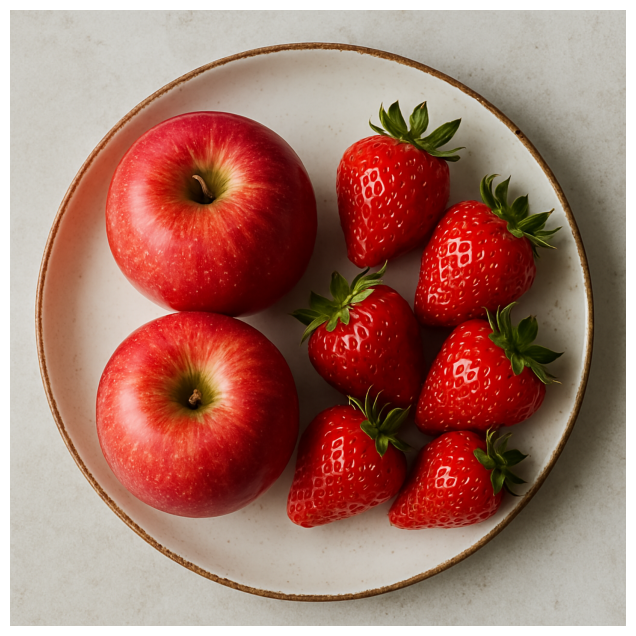

In [4]:
# 画像の読み込みと表示
image_path = '../assets/apple_strawberry.png'
image = Image.open(image_path)

plt.figure(figsize=(10, 8))
plt.imshow(image)
plt.axis('off')
plt.show()

## 2. 正常条件の定義

In [5]:
normal_conditions = """
Normal_condition1:There are two [apple]s and six [strawberry]s in the image.
Function1:

Create 1 Python function.
"""

# 正常条件をファイルに保存
with open('normal_conditions_apple_strawberry.py', 'w') as f:
    f.write(f'normal_conditions = """{normal_conditions}"""')

## 3. プログラムの自動生成

In [6]:
# openaiのAPIキーを設定
openai.api_key = os.getenv("OPENAI_API_KEY")

# プログラムの生成
generated_code = generate_code('normal_conditions_apple_strawberry.py')
print("生成されたコード:")
print(generated_code)

Generated code saved to: generated_code/code_normal_conditions_apple_strawberry_20250404_170719.py
生成されたコード:
```python
def execute_command1(image_path, image):
    image_patch = ImagePatch(image)
    
    # Find apples and strawberries in the image.
    patch_dict = image_patch.find("apple. strawberry")
    apple_patches = patch_dict["apple"]
    strawberry_patches = patch_dict["strawberry"]
    
    # Since you've detected two or more objects, make sure to use the 'delete_overlaps' function.
    apple_patches, strawberry_patches = delete_overlaps(apple_patches, strawberry_patches) 
    
    # Count the number of apples and strawberries in the image
    num_apples = len(apple_patches)
    num_strawberries = len(strawberry_patches)
    print(f"Number of apples is {num_apples}")
    print(f"Number of strawberries is {num_strawberries}")
    
    # Verify if the count matches the Normal_condition specification.
    anomaly_score = 0
    if num_apples != 2 or num_strawberries != 6:
       

## 4. プログラムの実行と結果の表示

In [16]:
# 関数を実行
function_definitions = generated_code.split('def ')

for i in range(1, 2):  # 1つの関数を実行
    func_name = f'execute_command{i}'
    final_code = 'def ' + function_definitions[i]
    # コードの整形
    final_code = final_code.replace("```", "")  # 不要なバッククォートを削除
    # 関数を実行
    result = execute_function_from_code(final_code, func_name, image_path, image)
    
    print("-"*20)
    print(f'{func_name}の結果:')
    if result == 0:
        print("正常です")
    else:
        print("異常です")
    print("-"*20)

excute -> execute_command1
Calling find function . Detect apple. strawberry.
obj_name apple. strawberry.
{'scores': tensor([0.7036, 0.6921, 0.6992, 0.6973, 0.7021, 0.6718, 0.6917, 0.6849],
       device='cuda:0'), 'labels': ['strawberry', 'apple', 'apple', 'strawberry', 'strawberry', 'strawberry', 'strawberry', 'strawberry'], 'boxes': tensor([[541.3205, 148.4952, 756.6813, 430.0300],
        [157.7929, 166.9421, 511.9003, 510.4682],
        [141.6638, 499.9066, 481.1853, 845.6560],
        [671.7510, 270.7420, 917.1451, 528.1439],
        [672.6368, 484.5295, 922.3478, 707.5107],
        [628.9856, 692.9944, 863.9783, 865.1585],
        [462.7391, 416.8180, 688.9782, 670.9291],
        [458.9991, 624.2040, 669.3864, 861.6790]], device='cuda:0')}
[[672, 484, 922, 707], [541, 148, 756, 430], [141, 499, 481, 845], [671, 270, 917, 528], [462, 416, 689, 670], [157, 166, 511, 510], [459, 624, 669, 861], [629, 693, 864, 865]] [0.7, 0.7, 0.7, 0.7, 0.69, 0.69, 0.68, 0.67] ['strawberry', 'strawb